# Visualizing statistical relationships


- 통계 분석은 데이터 세트 내 변수들이 서로 어떻게 관련되어 있고 이러한 관계가 다른 변수들에 어떻게 의존하는지 이해하는 과정입니다. 
- 시각화는 이 과정의 핵심 구성 요소가 될 수 있습니다. 
- 데이터가 적절하게 시각화되면 우리는 관련성을 나타내는 추세와 패턴을 볼 수 있습니다.

- 이번 튜토리얼에서는 seaborn 라이브러리의 세 가지 함수에 대해 논의합니다. 
- 우리가 가장 많이 사용할 함수는 `relplot()`입니다. 
- 이 함수는 산점도와 라인 플롯 두 가지 일반적인 방법을 사용하여 통계적 관계를 시각화하는 figure-level 함수입니다. 
- `relplot()` 함수는 FacetGrid와 두 개의 축 레벨 함수 중 하나를 결합합니다:

- `scatterplot()` (`kind='scatter`을 기본으로 세팅)
- `lineplot()` (`kind='line`을 기본으로 세팅)

- 이러한 함수들은 데이터 집합 구조를 나타낼 수 있는 간단하고 이해하기 쉬운 표현을 사용하기 때문에 매우 유용합니다. 
- 그들은 2차원 그래픽을 그리기 때문에 색조, 크기 및 스타일의 의미론을 사용하여 최대 3개의 추가 변수를 매핑하여 복잡한 데이터 집합 구조를 나타낼 수 있습니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Relating variables with scatter plot

- 산점도는 통계 시각화의 핵심입니다. 
- 데이터 집합의 각 관찰치를 나타내는 점 클라우드를 사용하여 두 변수의 공동 분포를 나타냅니다. 
- 이러한 표현은 두 변수 사이에 의미 있는 관계가 있는지에 대한 정보를 눈으로 추론할 수 있도록 합니다.






- seaborn에서 산점도를 그리는 여러 가지 방법이 있습니다. 
- 두 변수가 모두 숫자인 경우에 사용해야 하는 가장 기본적인 함수는 scatterplot()입니다. 
- 범주형 시각화 튜토리얼에서는 범주형 데이터를 시각화하기 위해 산점도를 사용하는 전용 도구를 볼 수 있습니다. 
- scatterplot()은 relplot()에서 기본 종류입니다 (kind="scatter"로 설정하여 강제로 설정할 수도 있음).

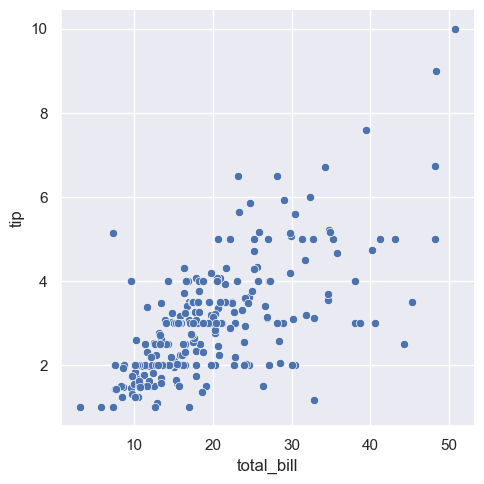

In [3]:
# relplot에서 기본 세팅은 scatter plot입니다.
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x='total_bill', y='tip');

- 점들이 두 차원에서 그려지지만, 세 번째 변수에 따라 점의 색상을 변경하여 그림에 다른 차원을 추가할 수 있습니다. 
- seaborn에서는 이를 "hue semantics"을 사용한다고합니다. 
- 이는 점의 색상이 의미를 가지기 때문입니다.

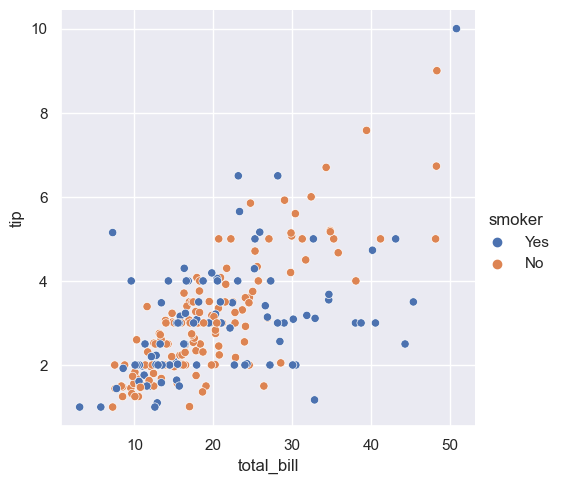

In [4]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker");

- 클래스 간 차이를 강조하고 접근성을 향상시키기 위해 각 클래스에 대해 다른 마커 스타일을 사용할 수 있습니다.

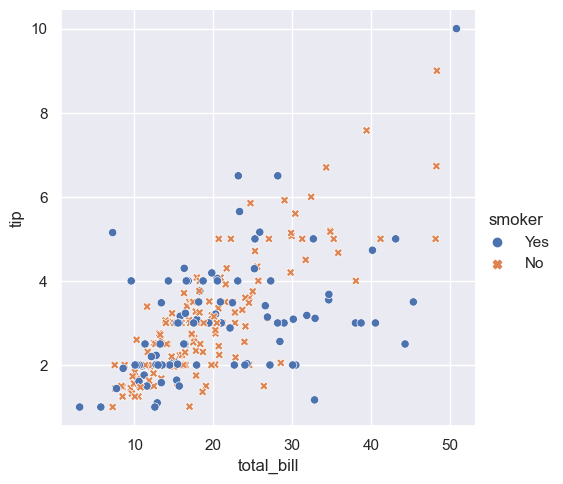

In [5]:
sns.relplot(
    data=tips,
    x='total_bill', y='tip', hue='smoker', style='smoker');

- 또한 각 점의 색상과 스타일을 독립적으로 변경하여 네 가지 변수를 나타낼 수 있습니다. 
- 그러나 눈은 색상보다는 모양에 덜 민감하기 때문에 이를 신중하게 처리해야합니다.





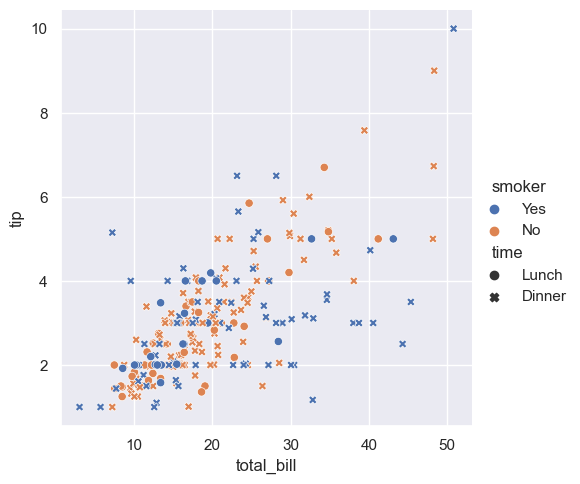

In [6]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker', 
    style='time');

- 위의 예시에서 hue semantic은 범주형이었으므로 기본 qualitative 팔레트가 적용되었습니다. 
- hue semantic이 숫자 인 경우 (구체적으로 float으로 변환 할 수있는 경우), 기본 색상이 sequential 팔레트로 전환됩니다.

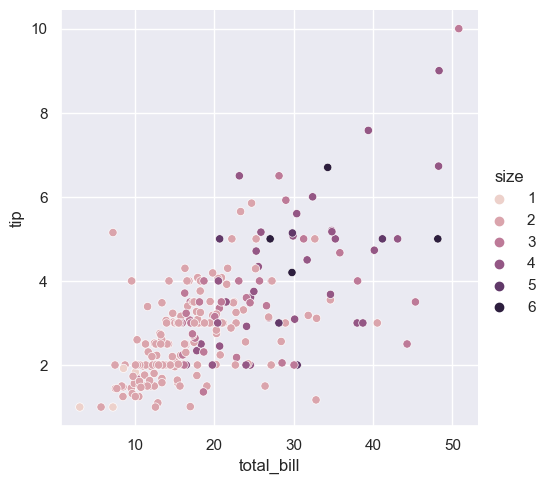

In [7]:
sns.relplot(
    data=tips, x='total_bill', y='tip', hue='size');

- 두 경우 모두 색상 팔레트를 사용자 정의할 수 있습니다. 
- 이를 위한 다양한 옵션이 있습니다. 
- 여기에서는 cubehelix_palette()의 문자열 인터페이스를 사용하여 sequential 팔레트를 사용자 정의합니다.





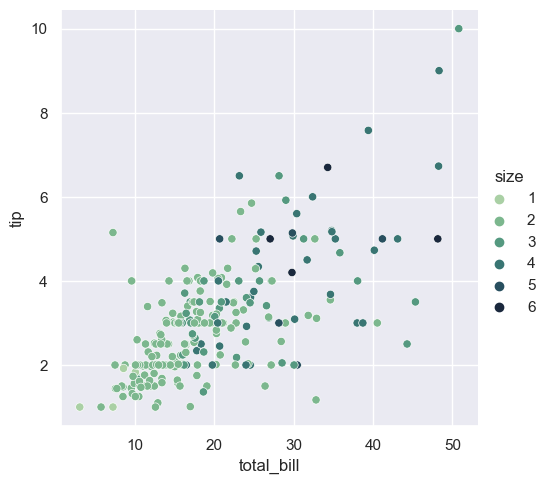

In [8]:
sns.relplot(
    data=tips,
    x='total_bill', y='tip',
    hue='size', palette='ch:r=-.5,l=.75');

- 세 번째 종류의 의미 변수는 각 점의 크기를 변경합니다.





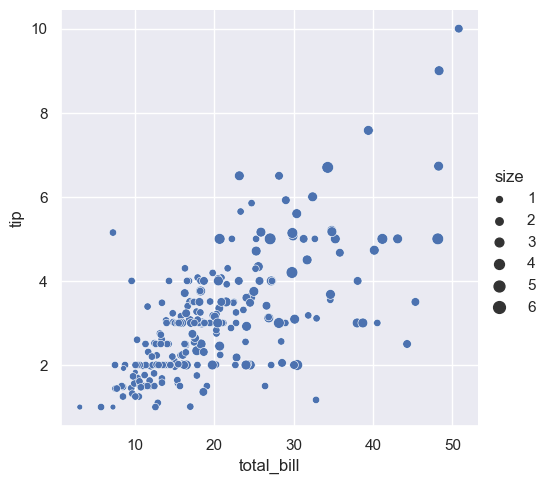

In [9]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size');

- `matplotlib.pyplot.scatter()`와 달리, 변수의 리터럴 값은 점의 면적을 선택하는 데 사용되지 않습니다. 대신 데이터 단위의 값 범위는 면적 단위의 범위로 정규화됩니다. 이 범위는 사용자 정의할 수 있습니다:

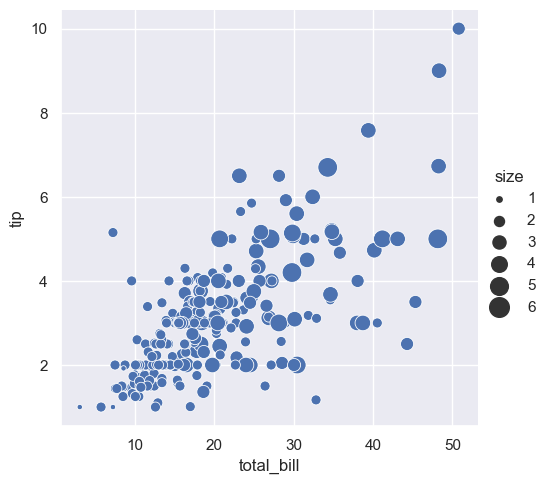

In [10]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
);


- 통계적인 관계를 위하 다양한 의미 변수 커스텀 예시들은 scatterplot() API 예제에서 확인 가능합니다. 

## Emphasizing continuity with line plots

- 산점도는 매우 효과적이지만, 시각화에서 최적인 유형은 없습니다. 
- 대신, 시각적 표현은 데이터셋의 구체적인 특성과 그래프로 답하려는 질문에 맞게 조정되어야 합니다.





- 일부 데이터셋의 경우, 연속 변수와 시간의 함수로서의 한 변수의 변화를 이해하고자 할 수 있습니다. 
- 이 경우에는 선 플롯을 그리는 것이 좋습니다. 
- Seaborn에서는 `lineplot()` 함수를 직접 사용하거나 `kind="line"`으로 설정하여 `relplot()`을 사용하여 이를 수행할 수 있습니다:





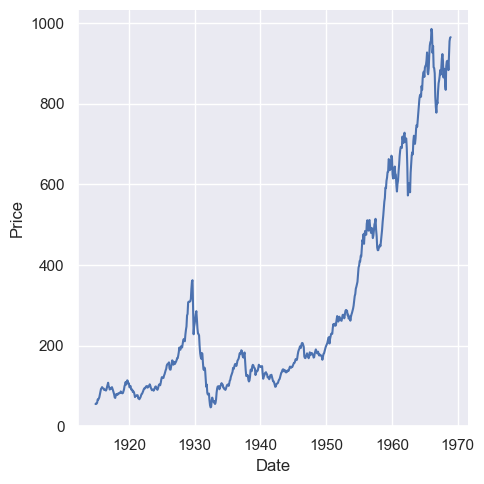

In [11]:
dowjones = sns.load_dataset('dowjones')
sns.relplot(data=dowjones, x='Date', y='Price', kind='line')

### Aggregation and representing uncertainty

- 보다 복잡한 데이터셋은 x 변수의 동일한 값에 대해 여러 측정값이 있을 수 있습니다. 
- Seaborn의 기본 동작은 각 x 값에서 다중 측정값을 집계하여 평균과 평균 주변의 95% 신뢰 구간을 그리는 것입니다.

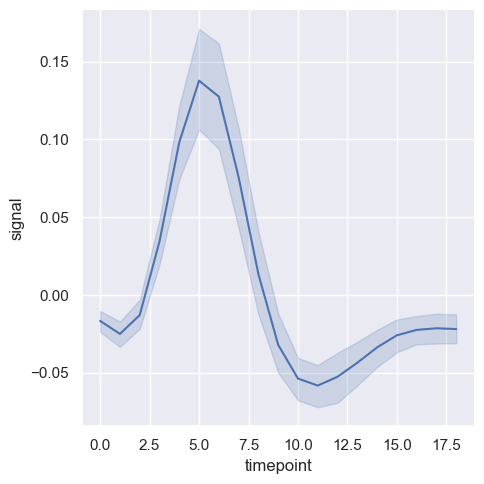

In [12]:
fmri = sns.load_dataset('fmri')
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line');

- 신뢰 구간은 부트스트래핑을 사용하여 계산되며, 대규모 데이터셋의 경우 시간이 많이 소요될 수 있습니다. 
- 따라서 이를 비활성화할 수 있습니다:





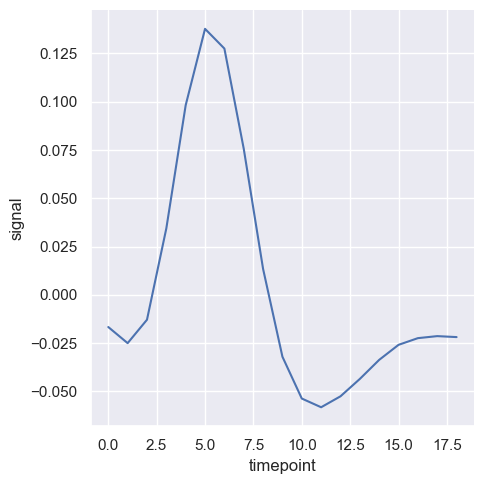

In [13]:
sns.relplot(
    data=fmri, kind='line',
    x='timepoint', y='signal', errorbar=None,
);

- 특히 대규모 데이터의 경우, 각 시간점에서 분포의 퍼짐을 신뢰 구간 대신 표준 편차를 그려 나타내는 것이 더 나은 선택지입니다.

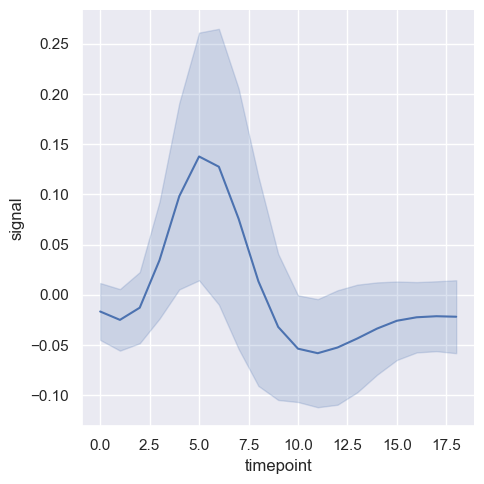

In [14]:
sns.relplot(
    data=fmri, kind='line',
    x='timepoint', y='signal', errorbar='sd',
);

- 집계를 완전히 끄려면 `estimator` 매개변수를 `None`으로 설정하면 됩니다. 
- 이렇게 하면 데이터가 각 지점마다 여러 관측치를 가지고 있을 때 이상한 효과가 나타날 수 있습니다.

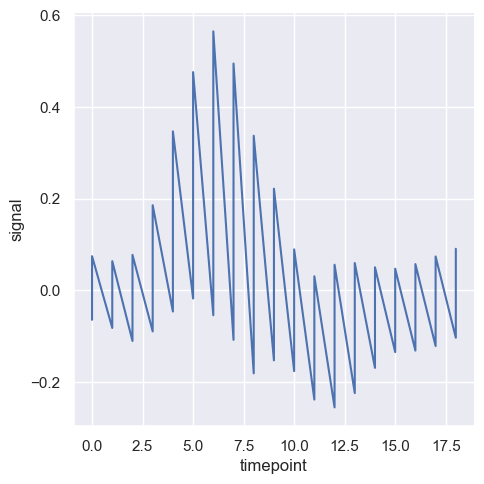

In [15]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
)

### Plotting subsets of data with semantic mappings


- `lineplot()` 함수는 플롯 요소의 색조, 크기, 스타일을 수정하여 최대 3개의 추가 변수를 표시할 수 있는 등 `scatterplot()`과 동일한 유연성을 가지고 있습니다. 
- 이 함수는 `scatterplot()`과 동일한 API를 사용하므로, matplotlib에서 선과 점의 모양을 제어하는 매개변수에 대해 고민할 필요가 없습니다.

- lineplot()에서 semantic을 사용하면 데이터가 집계되는 방식도 결정됩니다. 
- 예를 들어, 두 단계의 색조 시맨틱을 추가하면 플롯이 두 개의 선과 오류 구간으로 분할되고, 각각에 색상을 지정하여 해당 데이터의 하위 집합을 나타냅니다.

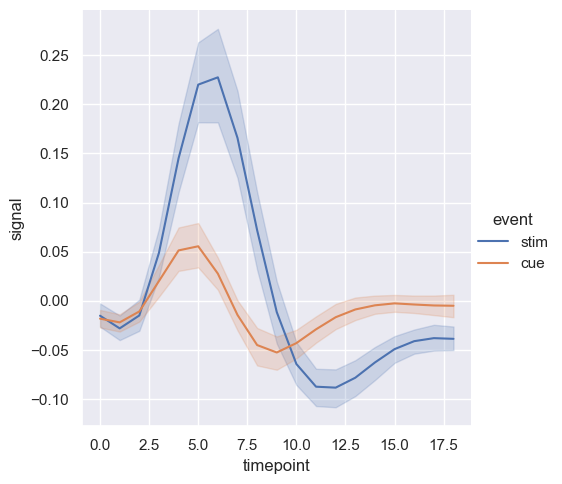

In [17]:
sns.relplot(
    data=fmri, kind='line',
    x='timepoint', y='signal', hue='event');

- 라인 플롯에 스타일 시맨틱을 추가하면 기본적으로 라인의 대시 패턴이 변경됩니다:

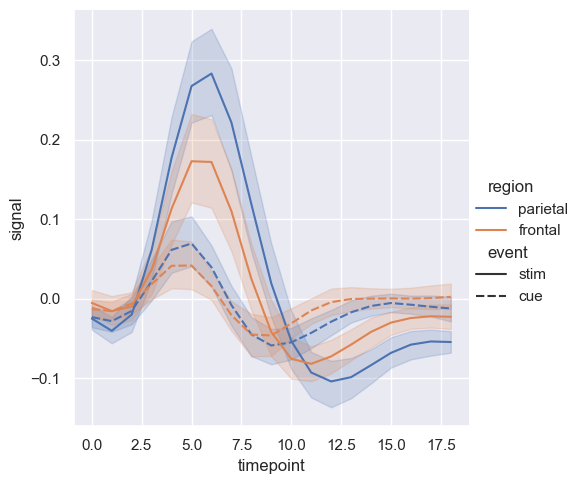

In [18]:
sns.relplot(
    data=fmri, kind='line', 
    x='timepoint', y='signal',
    hue='region', style='event')

- 그러나 각 관찰에 사용된 마커를 대시와 함께 또는 대시 대신 사용하여 하위 집합을 식별할 수 있습니다:

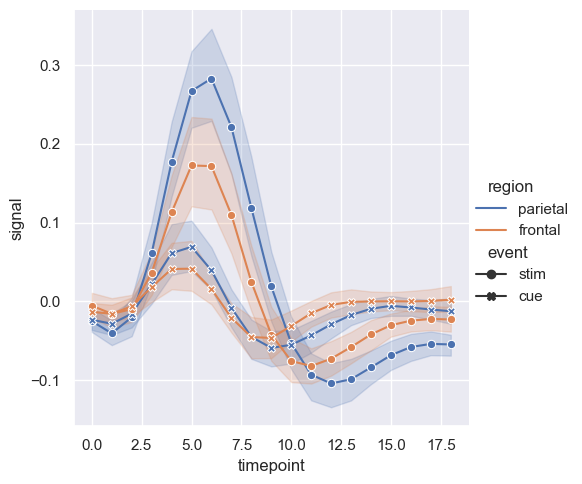

In [19]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

- 분산형 차트와 마찬가지로 여러 의미를 사용하여 라인 플롯을 만들 때는 주의해야 합니다. 
- 때로는 유익한 정보를 제공하기도 하지만, 구문 분석 및 해석이 어려울 수도 있습니다. 
- 그러나 하나의 추가 변수에 대한 변화만 조사하는 경우에도 선의 색상과 스타일을 모두 변경하는 것이 유용할 수 있습니다. 
- 이렇게 하면 흑백으로 인쇄하거나 색맹이 있는 사람이 볼 때 플롯에 더 쉽게 접근할 수 있습니다:

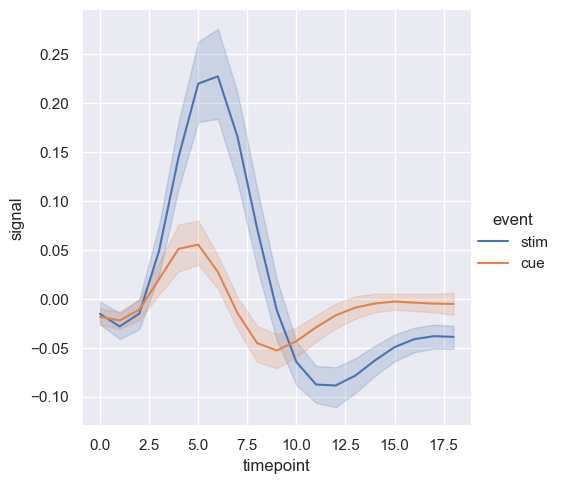

In [20]:
sns.relplot(
    data=fmri, kind='line',
    x='timepoint', y='signal', hue='event',
)

- 반복 측정값 데이터로 작업하는 경우(즉, 여러 번 샘플링된 단위가 있는 경우) 의미론을 통해 각 샘플링 단위를 구분하지 않고 개별적으로 플롯할 수도 있습니다. 
- 이렇게 하면 범례가 복잡해지는 것을 방지할 수 있습니다:

the default colormap 부터..